In [3]:
#!pip install keras-vggface

In [5]:
#!pip install opencv-python
#!pip install --user tqdm

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import copy
import numpy as np

from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
from keras_vggface.vggface import VGGFace
from keras_vggface import utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import pandas as pd
import cv2
import scipy.misc
import matplotlib.pyplot as plt
from tqdm import tqdm

# load dataset


In [7]:
base_path = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/'
image_gen = ImageDataGenerator(rescale=1./255.)
batch_size = 64
train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)
valid_flow = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)
test_flow = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


# Custom Architecture

In [9]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
"""
    Propsoed CNN architecture.
    
"""

model = Sequential()

# Pamameters Initialization
input_shape = (224,224,3)
activation = 'relu'
padding = 'same'
droprate = 0.1
epsilon=0.001

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))


model.add(Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=128, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=512, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(GlobalAveragePooling2D())
#model.add(Flatten())
#model.add(Dense(256, kernel_initializer='glorot_normal', activation='relu'))
#model.add(Dropout(0.5))
          
#model.add(Dense(128, kernel_initializer='glorot_normal', activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dropout(droprate))
model.add(Dense(1, activation='sigmoid'))

model.summary() # Summary of the architecture

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_8 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 112, 112, 16)      64        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 56, 56, 32)       

# Model Compile

In [10]:
# Parameters Initialization
from keras.optimizers import rmsprop,SGD,Adam,Adadelta

#opt = rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='binary_crossentropy',optimizer=Adam(0.0001), metrics=['accuracy'])

# Train Custom Model

In [11]:
train_steps = 40000//batch_size
valid_steps = 5000//batch_size
history = model.fit_generator(
    train_flow,
    epochs=10,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps
)

Epoch 1/10
625/625 [==============================] - 335s 537ms/step - loss: 0.5635 - accuracy: 0.7061 - val_loss: 0.6069 - val_accuracy: 0.6843
Epoch 2/10
625/625 [==============================] - 328s 524ms/step - loss: 0.4633 - accuracy: 0.7843 - val_loss: 0.5487 - val_accuracy: 0.7542
Epoch 3/10
625/625 [==============================] - 295s 471ms/step - loss: 0.3997 - accuracy: 0.8206 - val_loss: 0.5823 - val_accuracy: 0.8015
Epoch 4/10
625/625 [==============================] - 266s 425ms/step - loss: 0.3469 - accuracy: 0.8475 - val_loss: 0.3706 - val_accuracy: 0.8456
Epoch 5/10
625/625 [==============================] - 264s 422ms/step - loss: 0.3057 - accuracy: 0.8696 - val_loss: 0.1914 - val_accuracy: 0.8522
Epoch 6/10
625/625 [==============================] - 264s 422ms/step - loss: 0.2637 - accuracy: 0.8910 - val_loss: 0.4618 - val_accuracy: 0.7891
Epoch 7/10
625/625 [==============================] - 254s 406ms/step - loss: 0.2326 - accuracy: 0.9047 - val_loss: 0.2124 -

In [12]:
model.save("custom_model.h5") # save model

In [13]:
"""
Plot the training and validation loss
epochs - list of epoch numbers
loss - training loss for each epoch
val_loss - validation loss for each epoch
"""
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
"""
Plot the training and validation accuracy
epochs - list of epoch numbers
acc - training accuracy for each epoch
val_acc - validation accuracy for each epoch
"""
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

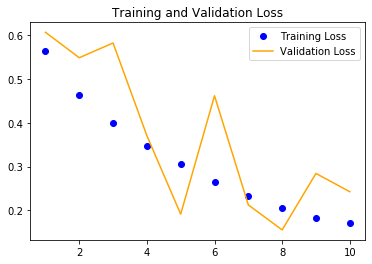

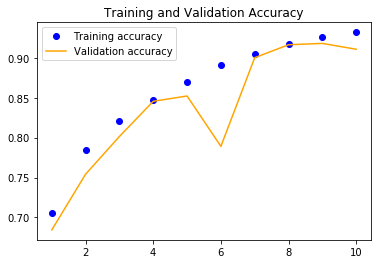

In [16]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

# Predict and Evaluate

In [17]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

In [19]:
from sklearn import metrics
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred > 0.5))

ROC AUC Score: 0.9858290600000001
AP Score: 0.9852092682720586

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     10000
           1       0.97      0.85      0.91     10000

    accuracy                           0.91     20000
   macro avg       0.92      0.91      0.91     20000
weighted avg       0.92      0.91      0.91     20000

